### 1. Baseline
* original dataset

In [1]:
import numpy as np
import os

MFCC = 13 # num of MFCC features

mfcc_folder = '../dataset/mfcc_features'
np_file = os.listdir(mfcc_folder)

# prepare data
X = np.zeros((len(np_file), MFCC)) # (n_samples, n_features)
y = np.zeros(len(np_file), dtype=int)  # (n_samples, )
# each group is one video
filenames = set()
groups = np.zeros(len(np_file), dtype=int)  # (n_samples, )

# load form directory
for i, file in enumerate(np_file):
    mfcc = np.load(os.path.join(mfcc_folder, file))
    X[i] = mfcc.mean(axis=1)    # (MFCC, )
    # 0: normal driving, 1: car crash
    label = 0 if int(file.split('_')[0]) < 5 else 1
    y[i] = label    
    filename = file[file.find('_') + 1:file.rfind('_')]  # segment is the second part of the filename
    # search with set to find unique value
    if filename not in filenames:
        filenames.add(filename)
        groups[i] = len(filenames)
    else:
        groups[i] = list(filenames).index(filename)

print(X[0])  # print the first sample
print(y[0])  # print the label of the first sample
print(groups[0])  # print the group of the first sample

[-398.98666382  113.03168488  -11.29673195   27.68769264    3.6051693
   11.02839375   -4.29368401    7.7390089     3.64515638    5.37020397
   -3.23544407    9.0578289    -4.63530731]
0
1


In [2]:
# random seed
import random
random.seed(0)
seed = 0

In [3]:
from sklearn.model_selection import GroupKFold
group_kfold = GroupKFold(n_splits=5) # 5-fold
print(group_kfold.get_n_splits(X, y, groups))  # print number of splits

5


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

clf = KNeighborsClassifier(n_neighbors=5)

# fit data (using k-fold)
for i, (train_index, test_index) in enumerate(group_kfold.split(X, y, groups)):
    print(f"Fold {i}:")
    # training
    clf.fit(X[train_index], y[train_index])
    # testing
    y_pred = clf.predict(X[test_index])

    print(f"Training Accuracy: {accuracy_score(y[train_index], clf.predict(X[train_index]))}")
    print(f"Validation Accuracy: {accuracy_score(y[test_index], y_pred)}")
    print(f"Precision: {precision_score(y[test_index], y_pred)}")
    print(f"Recall: {recall_score(y[test_index], y_pred)}")
    print(f"F1 Score: {f1_score(y[test_index], y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y[test_index], y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y[test_index], y_pred)}")
    print()

Fold 0:
Training Accuracy: 0.9603658536585366
Validation Accuracy: 0.6341463414634146
Precision: 1.0
Recall: 0.6153846153846154
F1 Score: 0.7619047619047619
ROC AUC: 0.8076923076923077
Confusion Matrix:
[[ 4  0]
 [30 48]]

Fold 1:
Training Accuracy: 0.9176829268292683
Validation Accuracy: 0.8658536585365854
Precision: 0.4375
Recall: 0.7777777777777778
F1 Score: 0.56
ROC AUC: 0.8272450532724505
Confusion Matrix:
[[64  9]
 [ 2  7]]

Fold 2:
Training Accuracy: 0.9054878048780488
Validation Accuracy: 0.8658536585365854
Precision: 0.4
Recall: 0.75
F1 Score: 0.5217391304347826
ROC AUC: 0.8141891891891893
Confusion Matrix:
[[65  9]
 [ 2  6]]

Fold 3:
Training Accuracy: 0.9176829268292683
Validation Accuracy: 0.6219512195121951
Precision: 0.17647058823529413
Recall: 0.6666666666666666
F1 Score: 0.27906976744186046
ROC AUC: 0.641552511415525
Confusion Matrix:
[[45 28]
 [ 3  6]]

Fold 4:
Training Accuracy: 0.9146341463414634
Validation Accuracy: 0.6219512195121951
Precision: 0.2682926829268293
R

In [5]:
class KNN():
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X_test):
        y_pred = []
        # select initial
        for i, x in enumerate(X_test):
            distances = []  # Reset distances for each test sample
            # calculate distance to all training points
            for j, neighbor in enumerate(self.X):
                # calculate distance
                distance = np.linalg.norm(x - neighbor)
                distances.append((distance, self.y[j]))
            # sort distances and select k nearest neighbors
            distances.sort(key=lambda x: x[0])  # sort with first element
            neighbors = distances[:self.n_neighbors]
            # majority vote
            votes = {}
            for _, label in neighbors:
                # if encounter increment one, else return 0
                votes[label] = votes.get(label, 0) + 1
            # accumulate
            y_pred.append(max(votes, key=votes.get))
        return y_pred

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

clf = KNN()

# fit data (using k-fold)
for i, (train_index, test_index) in enumerate(group_kfold.split(X, y, groups)):
    print(f"Fold {i}:")
    # training
    clf.fit(X[train_index], y[train_index])
    # testing
    y_pred = clf.predict(X[test_index])
    
    print(f"Training Accuracy: {accuracy_score(y[train_index], clf.predict(X[train_index]))}")
    print(f"Validation Accuracy: {accuracy_score(y[test_index], y_pred)}")
    print(f"Precision: {precision_score(y[test_index], y_pred)}")
    print(f"Recall: {recall_score(y[test_index], y_pred)}")
    print(f"F1 Score: {f1_score(y[test_index], y_pred)}")
    # print(f"ROC AUC: {roc_auc_score(y[test_index], y_pred_proba)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y[test_index], y_pred)}")
    print()

Fold 0:
Training Accuracy: 0.9603658536585366
Validation Accuracy: 0.6341463414634146
Precision: 1.0
Recall: 0.6153846153846154
F1 Score: 0.7619047619047619
Confusion Matrix:
[[ 4  0]
 [30 48]]

Fold 1:
Training Accuracy: 0.9176829268292683
Validation Accuracy: 0.8658536585365854
Precision: 0.4375
Recall: 0.7777777777777778
F1 Score: 0.56
Confusion Matrix:
[[64  9]
 [ 2  7]]

Fold 2:
Training Accuracy: 0.9054878048780488
Validation Accuracy: 0.8658536585365854
Precision: 0.4
Recall: 0.75
F1 Score: 0.5217391304347826
Confusion Matrix:
[[65  9]
 [ 2  6]]

Fold 3:
Training Accuracy: 0.9176829268292683
Validation Accuracy: 0.6219512195121951
Precision: 0.17647058823529413
Recall: 0.6666666666666666
F1 Score: 0.27906976744186046
Confusion Matrix:
[[45 28]
 [ 3  6]]

Fold 4:
Training Accuracy: 0.9146341463414634
Validation Accuracy: 0.6219512195121951
Precision: 0.2682926829268293
Recall: 0.9166666666666666
F1 Score: 0.41509433962264153
Confusion Matrix:
[[40 30]
 [ 1 11]]



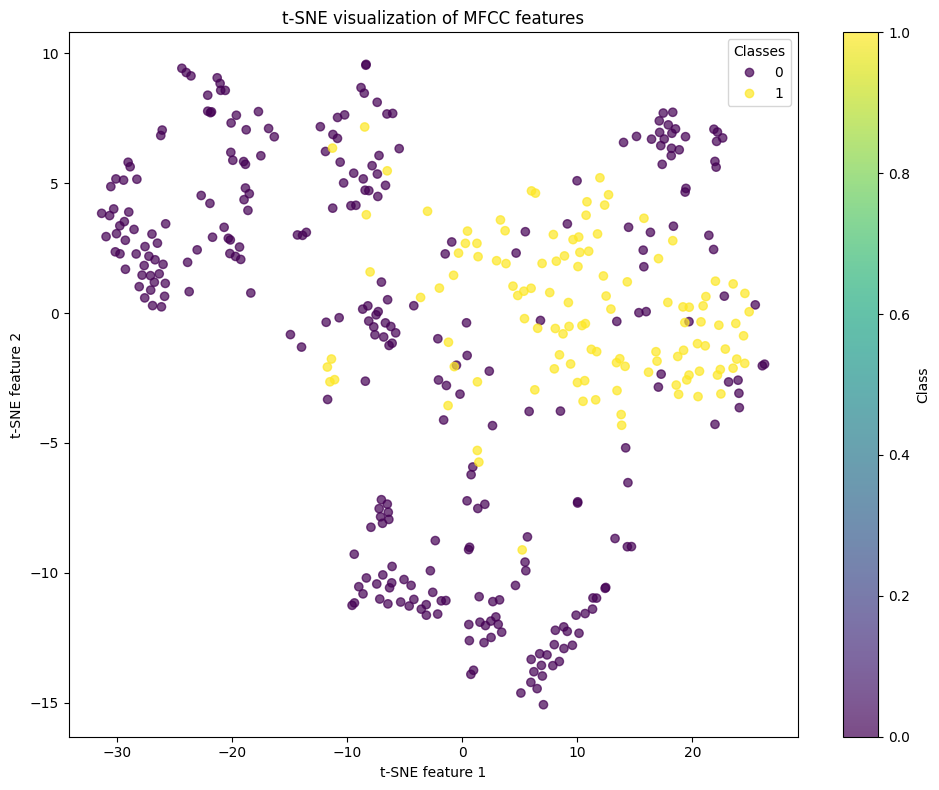

In [7]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=seed)
X_tsne = tsne.fit_transform(X)

# 创建散点图
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)

# 添加图例
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('t-SNE visualization of MFCC features')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(label='Class')

plt.tight_layout()
plt.show()

In [8]:
import time
import numpy as np

# Get a subset of test data for inference
# For this example, I'll use the last fold from the GroupKFold as test data
for i, (train_index, test_index) in enumerate(group_kfold.split(X, y, groups)):
    if i == 4:  # Use the last fold as test data
        test_data = X[test_index]
        break

# Warm-up runs
print("Warming up...")
for _ in range(10):
    _ = clf.predict(test_data)

# Measure inference time
print("Measuring inference time...")
n_iterations = 100
start_time = time.time()

for _ in range(n_iterations):
    _ = clf.predict(test_data)

end_time = time.time()

# Calculate statistics
total_time = end_time - start_time
avg_time_per_batch = total_time / n_iterations
avg_time_per_sample = total_time / (n_iterations * len(test_data))

print(f"Total time for {n_iterations} iterations: {total_time:.4f} seconds")
print(f"Average time per batch: {avg_time_per_batch*1000:.2f} ms")
print(f"Average time per sample: {avg_time_per_sample*1000:.2f} ms")
print(f"Inference speed: {n_iterations * len(test_data) / total_time:.2f} samples/second")


Warming up...
Measuring inference time...
Total time for 100 iterations: 29.3886 seconds
Average time per batch: 293.89 ms
Average time per sample: 3.58 ms
Inference speed: 279.02 samples/second


2. DataAug

In [9]:
def read_dataAug(mfcc_folder):
    np_file = os.listdir(mfcc_folder)

    # prepare data
    X_aug = np.zeros((len(np_file), MFCC)) # (n_samples, n_features)
    y_aug = np.zeros(len(np_file), dtype=int)  # (n_samples, )
    # each group is one video
    filenames = set()
    groups = np.zeros(len(np_file), dtype=int)  # (n_samples, )

    # load form directory
    for i, file in enumerate(np_file):
        mfcc = np.load(os.path.join(mfcc_folder, file))
        X_aug[i] = mfcc.mean(axis=1)    # (MFCC, )
        # 0: normal driving, 1: car crash
        label = 0 if int(file.split('_')[1]) < 5 else 1
        y_aug[i] = label    
        filename = file[file.find('_') + 1:file.rfind('_')]  # segment is the second part of the filename
        # search with set to find unique value
        if filename not in filenames:
            filenames.add(filename)
            groups[i] = len(filenames)
        else:
            groups[i] = list(filenames).index(filename)

    return X_aug, y_aug

if __name__ == "__main__":
    mfcc_folder = '../dataset/aug_mfcc_features'
    X_aug, y_aug = read_dataAug(mfcc_folder)
    print(X_aug[0])  # print the first sample
    print(y_aug[0])  # print the label of the first sample
    print(groups[0])  # print the group of the first sample

[-270.81295776  -15.02099133   38.02788925   13.21731472   10.0347805
    4.48674297    3.34693432    3.60442758    4.46276379    3.18351889
    2.26930118    1.81936967    0.86694759]
0
1


In [10]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

clf_aug = KNeighborsClassifier(n_neighbors=5)

# fit data (using k-fold)
for i, (train_index, test_index) in enumerate(group_kfold.split(X, y, groups)):
    print(f"Fold {i}:")
    # training
    X_combined = np.vstack((X[train_index].copy(), X_aug.copy()))
    y_combined = np.hstack((y[train_index].copy(), y_aug.copy()))
    
    clf_aug.fit(X_combined, y_combined)
    
    # testing
    y_pred = clf_aug.predict(X[test_index])
    y_pred_proba = clf_aug.predict_proba(X[test_index])[:, 1]  # probabilities for ROC AUC

    print(f"Training Accuracy: {accuracy_score(y_combined, clf_aug.predict(X_combined))}")
    print(f"Validation Accuracy: {accuracy_score(y[test_index], y_pred)}")
    print(f"Precision: {precision_score(y[test_index], y_pred)}")
    print(f"Recall: {recall_score(y[test_index], y_pred)}")
    print(f"F1 Score: {f1_score(y[test_index], y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y[test_index], y_pred_proba)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y[test_index], y_pred)}")
    print()

Fold 0:
Training Accuracy: 0.9417344173441734
Validation Accuracy: 0.6707317073170732
Precision: 1.0
Recall: 0.6538461538461539
F1 Score: 0.7906976744186046
ROC AUC: 0.9407051282051282
Confusion Matrix:
[[ 4  0]
 [27 51]]

Fold 1:
Training Accuracy: 0.9227642276422764
Validation Accuracy: 0.9024390243902439
Precision: 0.5384615384615384
Recall: 0.7777777777777778
F1 Score: 0.6363636363636364
ROC AUC: 0.9467275494672756
Confusion Matrix:
[[67  6]
 [ 2  7]]

Fold 2:
Training Accuracy: 0.9186991869918699
Validation Accuracy: 0.8780487804878049
Precision: 0.42857142857142855
Recall: 0.75
F1 Score: 0.5454545454545454
ROC AUC: 0.9324324324324325
Confusion Matrix:
[[66  8]
 [ 2  6]]

Fold 3:
Training Accuracy: 0.9200542005420054
Validation Accuracy: 0.7073170731707317
Precision: 0.2222222222222222
Recall: 0.6666666666666666
F1 Score: 0.3333333333333333
ROC AUC: 0.863013698630137
Confusion Matrix:
[[52 21]
 [ 3  6]]

Fold 4:
Training Accuracy: 0.924119241192412
Validation Accuracy: 0.780487804

In [11]:
import time
import numpy as np

# Get a subset of test data for inference
# For this example, I'll use the last fold from the GroupKFold as test data
for i, (train_index, test_index) in enumerate(group_kfold.split(X, y, groups)):
    if i == 4:  # Use the last fold as test data
        test_data = X[test_index]
        break

# Warm-up runs
print("Warming up...")
for _ in range(10):
    _ = clf_aug.predict(test_data)

# Measure inference time
print("Measuring inference time...")
n_iterations = 100
start_time = time.time()

for _ in range(n_iterations):
    _ = clf_aug.predict(test_data)

end_time = time.time()

# Calculate statistics
total_time = end_time - start_time
avg_time_per_batch = total_time / n_iterations
avg_time_per_sample = total_time / (n_iterations * len(test_data))

print(f"Total time for {n_iterations} iterations: {total_time:.4f} seconds")
print(f"Average time per batch: {avg_time_per_batch*1000:.2f} ms")
print(f"Average time per sample: {avg_time_per_sample*1000:.2f} ms")
print(f"Inference speed: {n_iterations * len(test_data) / total_time:.2f} samples/second")


Warming up...
Measuring inference time...
Total time for 100 iterations: 0.3475 seconds
Average time per batch: 3.47 ms
Average time per sample: 0.04 ms
Inference speed: 23597.97 samples/second


3. tsne

In [12]:
from sklearn.manifold import TSNE
# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=seed)
X_tsne = tsne.fit_transform(X)

In [13]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

clf_tsne = KNeighborsClassifier(n_neighbors=5)

# fit data (using k-fold)
for i, (train_index, test_index) in enumerate(group_kfold.split(X_tsne, y, groups)):
    print(f"Fold {i}:")
    # training
    clf_tsne.fit(X_tsne[train_index], y[train_index])
    
    # testing
    y_pred = clf_tsne.predict(X_tsne[test_index])
    y_pred_proba = clf_tsne.predict_proba(X_tsne[test_index])[:, 1]  # probabilities for ROC AUC

    print(f"Training Accuracy: {accuracy_score(y[train_index], clf_tsne.predict(X_tsne[train_index]))}")
    print(f"Validation Accuracy: {accuracy_score(y[test_index], y_pred)}")
    print(f"Precision: {precision_score(y[test_index], y_pred)}")
    print(f"Recall: {recall_score(y[test_index], y_pred)}")
    print(f"F1 Score: {f1_score(y[test_index], y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y[test_index], y_pred_proba)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y[test_index], y_pred)}")
    print()

Fold 0:
Training Accuracy: 0.9329268292682927
Validation Accuracy: 0.43902439024390244
Precision: 1.0
Recall: 0.41025641025641024
F1 Score: 0.5818181818181818
ROC AUC: 0.8878205128205128
Confusion Matrix:
[[ 4  0]
 [46 32]]

Fold 1:
Training Accuracy: 0.9024390243902439
Validation Accuracy: 0.8536585365853658
Precision: 0.4
Recall: 0.6666666666666666
F1 Score: 0.5
ROC AUC: 0.8592085235920852
Confusion Matrix:
[[64  9]
 [ 3  6]]

Fold 2:
Training Accuracy: 0.8902439024390244
Validation Accuracy: 0.9390243902439024
Precision: 0.6666666666666666
Recall: 0.75
F1 Score: 0.7058823529411765
ROC AUC: 0.9695945945945946
Confusion Matrix:
[[71  3]
 [ 2  6]]

Fold 3:
Training Accuracy: 0.9115853658536586
Validation Accuracy: 0.7317073170731707
Precision: 0.24
Recall: 0.6666666666666666
F1 Score: 0.35294117647058826
ROC AUC: 0.8143074581430746
Confusion Matrix:
[[54 19]
 [ 3  6]]

Fold 4:
Training Accuracy: 0.899390243902439
Validation Accuracy: 0.7926829268292683
Precision: 0.4074074074074074
Rec

In [14]:
import time
import numpy as np

# Get a subset of test data for inference
# For this example, I'll use the last fold from the GroupKFold as test data
for i, (train_index, test_index) in enumerate(group_kfold.split(X, y, groups)):
    if i == 4:  # Use the last fold as test data
        test_data = tsne.fit_transform(X[test_index])
        break

# Warm-up runs
print("Warming up...")
for _ in range(10):
    _ = clf_tsne.predict(test_data)

# Measure inference time
print("Measuring inference time...")
n_iterations = 100
start_time = time.time()

for _ in range(n_iterations):
    _ = clf_tsne.predict(test_data)

end_time = time.time()

# Calculate statistics
total_time = end_time - start_time
avg_time_per_batch = total_time / n_iterations
avg_time_per_sample = total_time / (n_iterations * len(test_data))

print(f"Total time for {n_iterations} iterations: {total_time:.4f} seconds")
print(f"Average time per batch: {avg_time_per_batch*1000:.2f} ms")
print(f"Average time per sample: {avg_time_per_sample*1000:.2f} ms")
print(f"Inference speed: {n_iterations * len(test_data) / total_time:.2f} samples/second")


Warming up...
Measuring inference time...
Total time for 100 iterations: 0.3220 seconds
Average time per batch: 3.22 ms
Average time per sample: 0.04 ms
Inference speed: 25467.74 samples/second
